#The data analysis using the stackover flow survey data for 2018, 2019 & 2020

We will be analysing the popluar language used and desiered in India acros years 2018, 2019 and 2020. We will also deep dive into Men vs Women respondant and what languages they have working in the tech Industy. 
Towards the end we will highlight some salary gap between Men and Women.

Importing the packages

In [1]:
#to read datasets 

import numpy as np
import pandas as pd

# to plot grpahs
import matplotlib.pyplot as plt
import seaborn as sns
import collections

#set the display size

pd.pandas.set_option('display.max_columns', None)

%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


#Checking the current working directory

In [2]:
#know your current working directory

import os
os.getcwd()

'D:\\ds\\code\\ds_blogpost'

In [ ]:
# read the survey data downloaded from stackoverflow

df_2018 = pd.read_csv('data/survey_results_public_2018.csv')
df_2019 = pd.read_csv('data/survey_results_public_2019.csv')
df_2020 = pd.read_csv('data/survey_results_public_2020.csv')


In [3]:
#display the data
df_2020.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

In [4]:
df_2019.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technolo

In [5]:
df_2018.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,JobContactPriorities3,JobContactPriorities4,JobContactPriorities5,JobEmailPriorities1,JobEmailPriorities2,JobEmailPriorities3,JobEmailPriorities4,JobEmailPriorities5,JobEmailPriorities6,JobEmailPriorities7,UpdateCV,Currency,Salary,SalaryType,ConvertedSalary,CurrencySymbol,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,NumberMonitors,Methodology,VersionControl,CheckInCode,AdBlocker,AdBlockerDisable,AdBlockerReasons,AdsAgreeDisagree1,AdsAgreeDisagree2,AdsAgreeDisagree3,AdsActions,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Extremely satisfied,Extremely satisfied,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year ago,10.0,7.0,8.0,1.0,2.0,5.0,3.0,4.0,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,4.0,2.0,5.0,5.0,6.0,7.0,2.0,1.0,4.0,3.0,My job status or other personal status changed,NaN,NaN,Monthly,NaN,KES,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,To build my professional network,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,1,Agile;Scrum,Git,Multiple times per day,Yes,No,NaN,Strongly agree,Strongly agree,Strongly agree,Saw an online advertisement and then researche...,1.0,5.0,4.0,7.0,2.0,6.0,3.0,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,No,"Yes, and publicly",Upper management at the company/organization,Yes,10 (Very Likely),Multiple times per day,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a jobs boar...",Yes,NaN,Yes,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Between 5:00 - 6:00 AM,9 - 12 hours,1 - 2 hours,Never,Standing desk,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,Unite

## understanding data
Subsetting the country


In [6]:
##subsetting the data by country and selecting the variables
def subset_country(df, column_filter, country, columns):
    
    ''' Filter a dataframe by country.,
        returns filtred dataframe.
    '''
    
    df_v1 = df
    
    for column in columns: 
        df_v1 = df_v1[df_v1[column_filter] == country].dropna(subset=[column])
        
    return df_v1


In [7]:
#In_2018 = subset_country(df_2018, 'Country', 'India', ['Respondent','LanguageWorkedWith', 'LanguageDesireNextYear','JobSatisfaction','Gender','ConvertedSalary'])
In_2018 = subset_country(df_2018, 'Country', 'India', ['Respondent','LanguageWorkedWith', 'LanguageDesireNextYear'])
#In_2019 = subset_country(df_2019, 'Country', 'India', ['Respondent','LanguageWorkedWith', 'LanguageDesireNextYear','JobSat','Gender','ConvertedComp'])
In_2019 = subset_country(df_2019, 'Country', 'India', ['Respondent','LanguageWorkedWith', 'LanguageDesireNextYear'])
In_2020 = subset_country(df_2020, 'Country', 'India', ['Respondent','LanguageWorkedWith', 'LanguageDesireNextYear'])

In [136]:
In_2018.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,JobContactPriorities3,JobContactPriorities4,JobContactPriorities5,JobEmailPriorities1,JobEmailPriorities2,JobEmailPriorities3,JobEmailPriorities4,JobEmailPriorities5,JobEmailPriorities6,JobEmailPriorities7,UpdateCV,Currency,Salary,SalaryType,ConvertedSalary,CurrencySymbol,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,NumberMonitors,Methodology,VersionControl,CheckInCode,AdBlocker,AdBlockerDisable,AdBlockerReasons,AdsAgreeDisagree1,AdsAgreeDisagree2,AdsAgreeDisagree3,AdsActions,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
13,20,No,No,India,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Another engineering discipline (ex. civil, ele...",20 to 99 employees,Back-end developer;Full-stack developer,3-5 years,3-5 years,Extremely satisfied,Moderately satisfied,Working as an engineering manager or other fun...,"I’m not actively looking, but I am open to new...",Less than a year ago,6.0,9.0,2.0,4.0,3.0,5.0,8.0,7.0,10.0,1.0,5.0,2.0,1.0,11.0,6.0,8.0,10.0,4.0,7.0,3.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Java,Java;Python,MongoDB;MySQL;Oracle;MariaDB;Elasticsearch,MongoDB;MySQL;Oracle;MariaDB;Apache HBase;Elas...,Linux,Linux,Spring,Hadoop;Spark;Spring,Eclipse;NetBeans,Linux-based,More than 4,Agile,Git,Multiple times per day,Yes,No,NaN,Strongly agree,NaN,NaN,Stopped going to a website because of their ad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Increasing automation of jobs,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,Depends on what it is,"Yes, but only within the company",The developer who wrote it,Yes,10 (Very Likely),Multiple times per day,Yes,Daily or almost daily,Yes,"No, and I don't know what that is",10 (Very Likely),Yes,Somewhat interested,Extremely interested,Extremely interested,A little bit interested,Somewhat interested,Between 6:01 - 7:00 AM,5 - 8 hours,1 - 2 hours,Never,Ergonomic keyboard or mouse,I don't typically exercise,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,29,Yes,Yes,India,"Yes, full-time",Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",NaN,"10,000 or more employees",Data or business analyst;Data scientist or mac...,0-2 years,3-5 years,Slightly satisfied,Extremely satisfied,Doing the same work,"I’m not actively looking, but I am open to new...",Between 1 and 2 years ago,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [137]:
def split_lang_column(df, column):
    ''' Split column by ;,
        returns a splited series.
    '''
    
    df_copy = df
    column_series = df_copy[column].apply(lambda x: x.split(';'))
    
    return column_series


In [138]:
worked_lang_2018 = split_lang_column(In_2018, 'LanguageWorkedWith')
wanted_lang_2018 = split_lang_column(In_2018, 'LanguageDesireNextYear')

worked_lang_2019 = split_lang_column(In_2019, 'LanguageWorkedWith')
wanted_lang_2019 = split_lang_column(In_2019, 'LanguageDesireNextYear')

worked_lang_2020 = split_lang_column(In_2020, 'LanguageWorkedWith')
wanted_lang_2020 = split_lang_column(In_2020, 'LanguageDesireNextYear')

In [139]:
worked_lang_2018.head()

13                                               [Java]
18                                         [C, C++, C#]
24       [C, C++, Java, JavaScript, SQL, Swift, Kotlin]
41                                     [PHP, HTML, CSS]
44    [C, C++, Java, JavaScript, PHP, Python, HTML, ...
Name: LanguageWorkedWith, dtype: object

In [25]:
# disarraying the language column to have one row per language
def disarray(array_list):
    ''' Flat a nested list,
        returns a flat list.
    '''
    
    objects = []
    
    for row in array_list:
        for obj in row:
            # In the survey data in 2018, HTML and CSS were two sperate options, however, in 2019 & 2020 they are consider
            if obj == 'HTML' or obj== 'CSS' :
                obj='HTML/CSS'
            objects.append(obj.strip())
            
    return objects

list_worked_languages_2018 = disarray(worked_lang_2018)
list_wanted_languages_2018 = disarray(wanted_lang_2018)
list_worked_languages_2019 = disarray(worked_lang_2019)
list_wanted_languages_2019 = disarray(wanted_lang_2019)
list_worked_languages_2020 = disarray(worked_lang_2020)
list_wanted_languages_2020 = disarray(wanted_lang_2020)


In [26]:
# language count per year
def group_list(data_list, year):
    ''' Group by count to a list,
        returns a result dict.
    '''
    
    grouped_list = dict(collections.Counter(data_list))
    grouped_dict = [{'Programming Language':key, 'Count': value, 'Year': year} for key, value in grouped_list.items()]
    
    return grouped_dict

# Groping a list and creating a dict.

dict_worked_languages_2018 = group_list(list_worked_languages_2018, '2018')
dict_wanted_languages_2018 = group_list(list_wanted_languages_2018, '2018')

dict_worked_languages_2019 = group_list(list_worked_languages_2019, '2019')
dict_wanted_languages_2019 = group_list(list_wanted_languages_2019, '2019')

dict_worked_languages_2020 = group_list(list_worked_languages_2020, '2020')
dict_wanted_languages_2020 = group_list(list_wanted_languages_2020, '2020')


In [28]:
# createing the dataframe from sictionary and appending all dataframes
def create_append_dataframe(data_dicts):
    ''' Create two dataframes and append them,
        returns a appended dataframe.
    '''
        
    df1 = pd.DataFrame(data_dicts[0])
    df2 = pd.DataFrame(data_dicts[1])
    df3 = pd.DataFrame(data_dicts[2])

    df = df1.append(df2).append(df3)
    
    return df

# Creating a Data Frame appending the data.
worked_languages = create_append_dataframe([dict_worked_languages_2018, dict_worked_languages_2019, dict_worked_languages_2020])
wanted_languages = create_append_dataframe([dict_wanted_languages_2018, dict_wanted_languages_2019, dict_wanted_languages_2020])



In [29]:
#population percentage of each year for survey participatns
def pop_percentage(df, column):
    ''' Scale data,
        returns data scaled.
    '''
    
    df_copy = df
    series = []
    
    for val in df_copy[column].unique():
        series.append(df_copy[df_copy[column] == val]['Count'] / 
                      df_copy[df_copy[column] == val]['Count'].sum())
    
    joined_series = pd.Series()
    for i_series in series:
        joined_series = joined_series.append(i_series)
        
    return joined_series

# Calculating the percentage
worked_languages['Percentage'] = pop_percentage(worked_languages, 'Year')
wanted_languages['Percentage'] = pop_percentage(wanted_languages, 'Year')


In [30]:
# Get the top 10 languages
top_10_worked_lang = worked_languages.sort_values(by=['Year','Percentage'], ascending=False).head(10)['Programming Language'].unique()
top_10_wanted_lang = wanted_languages.sort_values(by=['Year','Percentage'], ascending=False).head(10)['Programming Language'].unique()

worked_lang_chart = worked_languages[worked_languages['Programming Language'].isin(top_10_worked_lang)]
wanted_lang_chart = wanted_languages[wanted_languages['Programming Language'].isin(top_10_worked_lang)]

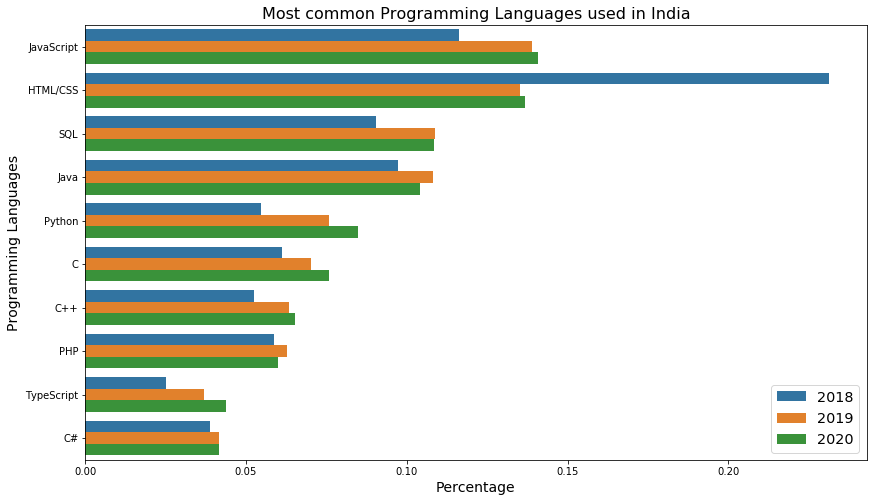

In [32]:
# Figure 1 — Percentage of use of programming languages among all the cited programming 
# languages by the respondents.

plt.figure(figsize=(14,8))
sns.barplot(x = 'Percentage', 
            y = 'Programming Language',
            hue = 'Year',
            data = worked_lang_chart.sort_values(by=['Year','Percentage'], ascending=False))

plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("Programming Languages", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.title('Most common Programming Languages used in India', size = 16)
plt.show()


In [270]:
worked_lang_chart[worked_lang_chart['Programming Language']=='Python']

,Count,Programming Language,Year,Percentage
5,2662,Python,2018,0.054614
7,2940,Python,2019,0.075769
5,2468,Python,2020,0.084975


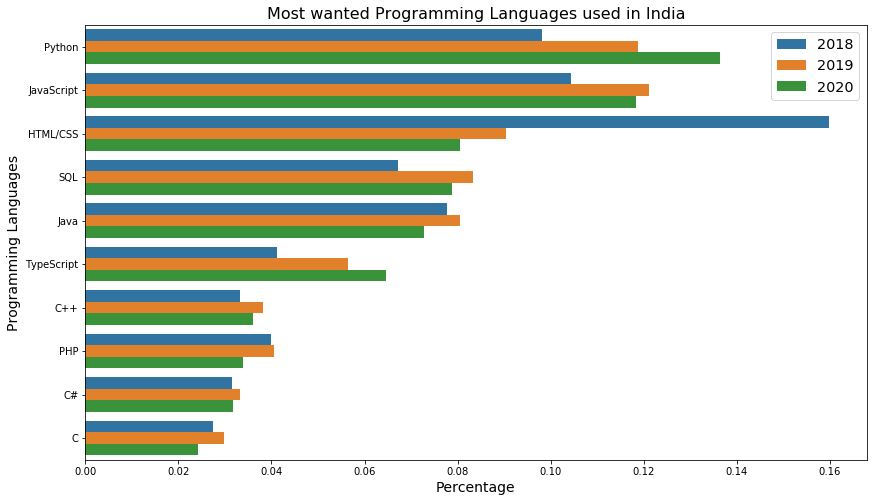

In [129]:
# Figure 2 — Percentage of desire of programming languages among all the cited programming 
# languages by the respondents.

plt.figure(figsize=(14,8))
sns.barplot(x = 'Percentage', 
            y = 'Programming Language',
            hue = 'Year',
            data = wanted_lang_chart.sort_values(by=['Year','Percentage'], ascending=False))

plt.title('Most wanted Programming Languages used in India', size = 16)
plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("Programming Languages", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.show()

In [49]:
In_2020_worked=subset_country(df_2020, 'Country', 'India', ['Respondent','LanguageWorkedWith'])

In [272]:
def plot_bar_chart(df, column, title):
    vals = df[column].value_counts()
    (vals[:10]/df.shape[0]).plot(kind="bar")
    plt.title(title, fontsize=24)

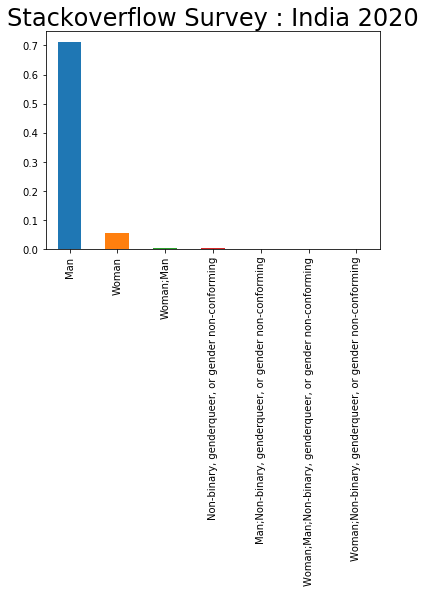

In [273]:
plot_bar_chart(In_2020_worked,"Gender","Stackoverflow Survey : India 2020")

## WORDCLOUD CHAR FOR MY BLOG

In [264]:
df_wordcloud = pd.DataFrame(dict_wanted_languages_2020)

In [265]:
df_wordcloud.head()

,Count,Programming Language,Year
0,860,C#,2020
1,654,Rust,2020
2,1297,Kotlin,2020
3,736,Bash/Shell/PowerShell,2020
4,477,Scala,2020


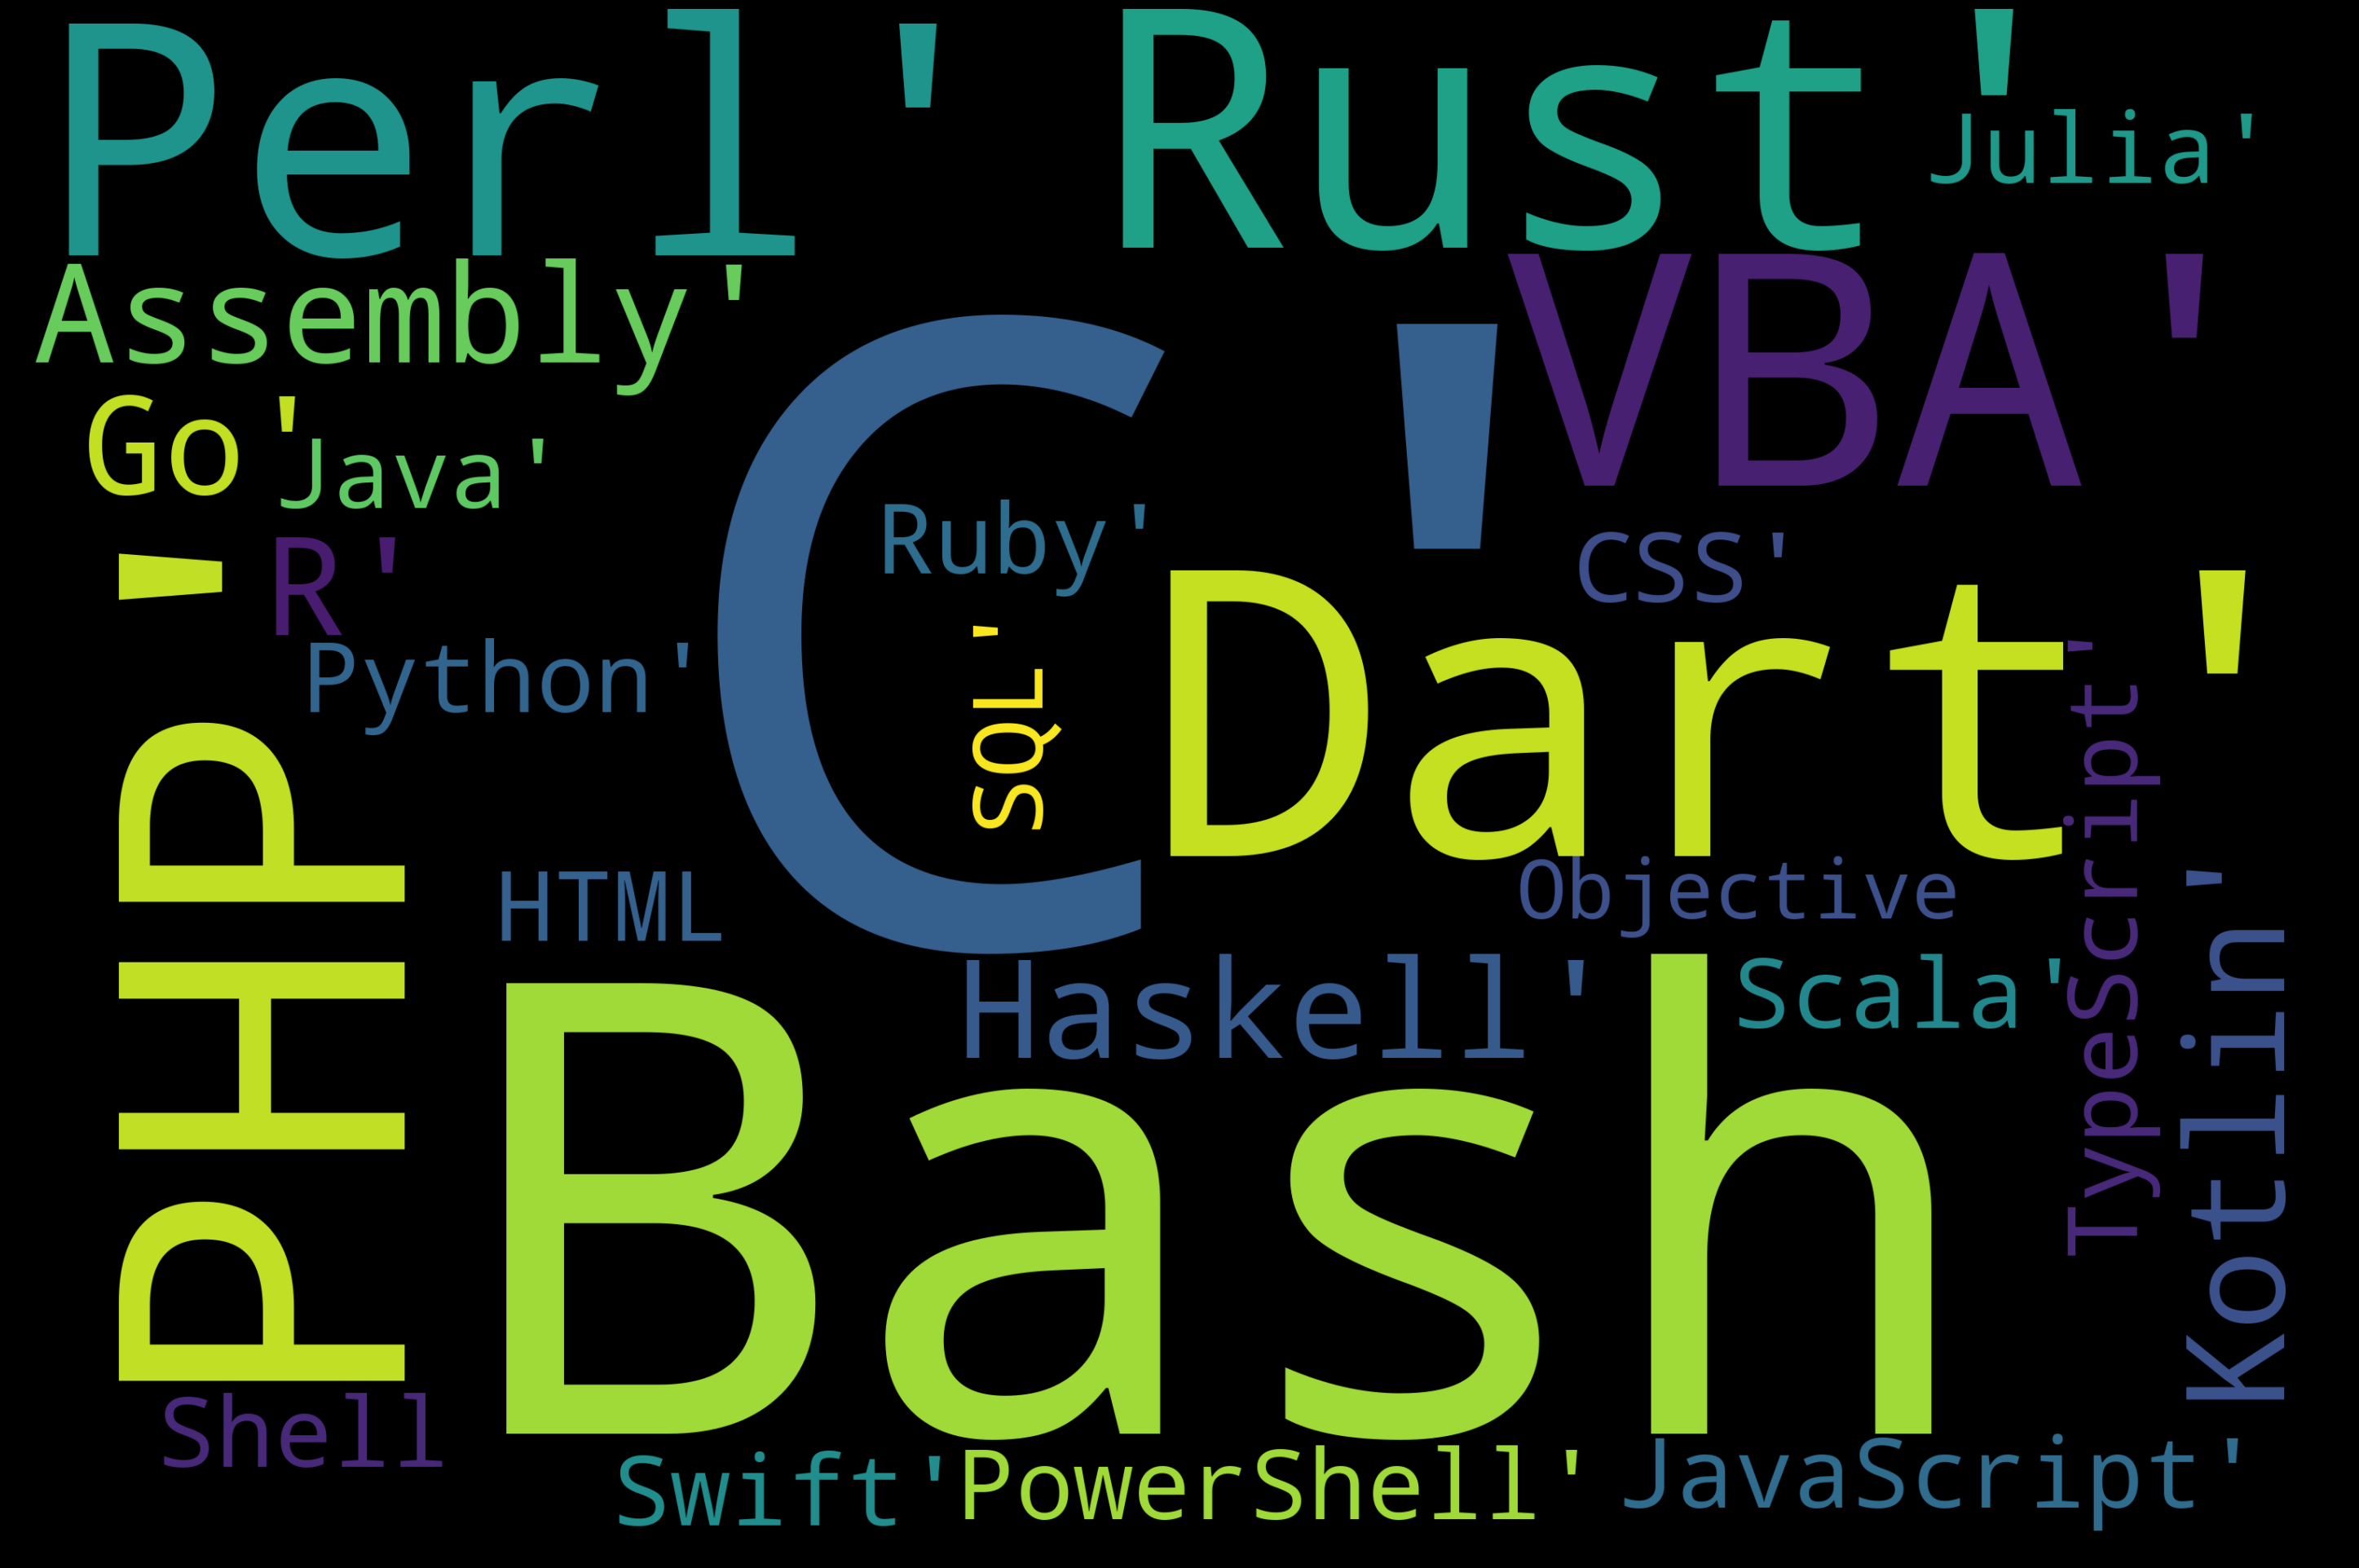

In [266]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = df_wordcloud['Programming Language'].values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## lets see the respondant ratio by Gender in 2020 
# we will be using some of the function we have created above
we will seeing which language is being used currently by geneder

In [52]:
#We will only keep Men and Woen and will get rid off the other categories as we have low responses
In_2020_Man=subset_country(df_2020, 'Gender', 'Man', ['Respondent','LanguageWorkedWith'])
In_2020_Woman=subset_country(df_2020, 'Gender', 'Woman', ['Respondent','LanguageWorkedWith'])

In [54]:
In_2020_Woman.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
34,35,I am a student who is learning to code,Yes,16.0,13,NaN,NaN,NaN,United States,NaN,NaN,MongoDB;MySQL,MongoDB;MySQL,"Designer;Developer, front-end","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Not employed, but looking for work",White or of European descent,Woman,Flex time or a flexible schedule;Remote work o...,NaN,"I’m not actively looking, but I am open to new...",HTML/CSS;JavaScript;Python;TypeScript,HTML/CSS;Java;JavaScript;Ruby,Node.js,Node.js;React Native,Github,Github;Trello,NaN,NaN,NaN,NaN,NaN,Once a year,NaN,NaN,Yes,NaN,Visit developer communities like Stack Overflo...,"Hello, old friend",Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,NaN,NaN,AWS;iOS;Linux;WordPress,NaN,Straight / Heterosexual,Yes,"Yes, somewhat",Less than once per month or monthly,A few times per month or weekly,Easy,Too long,No,"Information systems, information technology, o...",Angular;Angular.js;Express;jQuery;React.js;Vue.js,Express;jQuery,Just as welcome now as I felt last year,NaN,3,NaN
39,40,I am a student who is learning to code,Yes,20.0,14,NaN,NaN,NaN,United States,NaN,NaN,MySQL,MySQL;SQLite,NaN,"Associate degree (A.A., A.S., etc.)",Student,Hispanic or Latino/a/x,Woman,Industry that I’d be working in;Flex time or a...,NaN,"I’m not actively looking, but I am open to new...",C#;HTML/CSS;JavaScript;Python,C;C#;C++;HTML/CSS;JavaScript;PHP;Python;SQL,Unity 3D;Unreal Engine,.NET;Unity 3D;Unreal Engine,Jira;Github;Gitlab;Slack;Trello;Google Suite (...,Confluence;Jira;Github;Gitlab;Slack;Trello;Goo...,NaN,NaN,NaN,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Windows,NaN,Android;iOS;Linux;Windows,Android;iOS;Linux;Windows,NaN,Straight / Heterosexual,Yes,"No, not really",I have never participated in Q&A on Stack Over...,A few times per month or weekly,Easy,Appropriate in length,No,NaN,NaN,NaN,Just as welcome now as I felt last year,NaN,6,NaN
55,56,I am a developer by profession,Yes,27.0,21,NaN,NaN,NaN,United States,United States dollar,USD,Elasticsearch,DynamoDB;MySQL;Redis,"Developer, full-stack","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,White or of European descent,Woman,Diversity of the company or organization;Speci...,Very satisfied,I am not interested in new job opportunities,Python;TypeScript,HTML/CSS;JavaScript;PHP;Python;SQL;TypeScript,Unity 3D;Unreal Engine,NaN,Gitlab;Slack;Stack Overflow for Teams,Confluence;Jira;Github;Gitlab;Slack,Yes,Neutral,Somewhat important,Trouble with my direct manager;Trouble with le...,Company reviews from third party sites (e.g. G...,Once a year,Not sure,No,No,Never,NaN,Indifferent,Stack Overflow (public Q&A for anyone who code...,Play games;Call a coworker or friend;Visit Sta...,MacOS,500 to 999 employees,Docker;Kubernetes;Linux,Docker;Linux,I have little or no influence,Straight / Heterosexual,Yes,"Yes, definitely",Daily or almost daily,Multiple times per day,Easy,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Django,Symfony,Just as welcome now as I felt last year,40.0,6,4
65,66,I am a developer by profession,Yes,21.0,9,NaN,NaN,NaN,Canada,NaN,NaN,Postgre

In [55]:
In_2020_Man.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,NaN,MySQL;PostgreSQL,MySQL;PostgreSQL;Redis;SQLite,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,White or of European descent,Man,NaN,NaN,NaN,Java;Ruby;Scala,HTML/CSS;Ruby;SQL,Ansible;Chef,Ansible,"Github;Google Suite (Docs, Meet, etc)",Confluence;Jira;Github;Slack;Google Suite (Doc...,NaN,NaN,Very important,NaN,NaN,Once a year,No,NaN,Yes,NaN,Start a free trial;Ask developers I know/work ...,"Hello, old friend",Stack Overflow (public Q&A for anyone who code...,Call a coworker or friend;Visit Stack Overflow...,Windows,NaN,Docker;Google Cloud Platform;Heroku;Linux;Windows,AWS;Docker;Linux;MacOS;Windows,NaN,Straight / Heterosexual,Yes,"Yes, somewhat",Less than once per month or monthly,A few times per month or weekly,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
5,6,I am a developer by profession,No,NaN,14,NaN,NaN,NaN,Germany,European Euro,EUR,NaN,NaN,"Designer;Developer, front-end;Developer, mobile","Secondary school (e.g. American high school, G...",Employed full-time,White or of European descent,Man,Diversity of the company or organization;Langu...,Slightly satisfied,I am not interested in new job opportunities,HTML/CSS;Java;JavaScript,HTML/CSS;Java;JavaScript,NaN,NaN,Github;Slack,Confluence;Github;Slack;Trello,Not sure,NaN,Fairly important,NaN,NaN,Once a year,No,No,No,Never,Ask developers I know/work with;Read ratings o...,Amused,Stack Overflow (public Q&A for anyone who code...,Play games;Visit Stack Overflow;Watch help / t...,Windows,NaN,Android,Android;Docker;WordPress,I have some influence,Straight / Heterosexual,Yes,"Yes, somewhat",A few times per month or weekly,A few times per week,Neither easy nor difficult,Appropriate in length,NaN,NaN,React.js,NaN,NaN,NaN,6,4
7,8,I am a developer by profession,Yes,36.0,1

In [63]:
worked_lang_man_2020 = split_lang_column(In_2020_Man, 'LanguageWorkedWith')
worked_lang_woman_2020 = split_lang_column(In_2020_Woman, 'LanguageWorkedWith')
list_worked_lang_man_2020 = disarray(worked_lang_man_2020)
list_worked_lang_woman_2020 = disarray(worked_lang_woman_2020)
dict_worked_languages_Man = group_list(list_worked_lang_man_2020, 'Man_2020')
dict_worked_languages_Woman = group_list(list_worked_lang_woman_2020, 'Woman_2020')

df_man = pd.DataFrame(dict_worked_languages_Man)
df_woman = pd.DataFrame(dict_worked_languages_Woman)
df_all_worked =df_man.append(df_woman)

In [64]:
df_all_worked.head()

,Count,Programming Language,Year
0,14707,C#,Man_2020
1,9798,C,Man_2020
2,3632,Kotlin,Man_2020
3,15726,Bash/Shell/PowerShell,Man_2020
4,1646,Scala,Man_2020


In [66]:
df_all_worked['Percentage'] = pop_percentage(df_all_worked, 'Year')

In [68]:
df_all_worked.head()

,Count,Programming Language,Year,Percentage
0,14707,C#,Man_2020,0.063851
1,9798,C,Man_2020,0.042539
2,3632,Kotlin,Man_2020,0.015769
3,15726,Bash/Shell/PowerShell,Man_2020,0.068275
4,1646,Scala,Man_2020,0.007146


In [69]:
# Get the top 10 languages
top_10_worked_2020 = df_all_worked.sort_values(by=['Year','Percentage'], ascending=False).head(10)['Programming Language'].unique()
worked_lang_chart_2020 = df_all_worked[df_all_worked['Programming Language'].isin(top_10_worked_lang)]


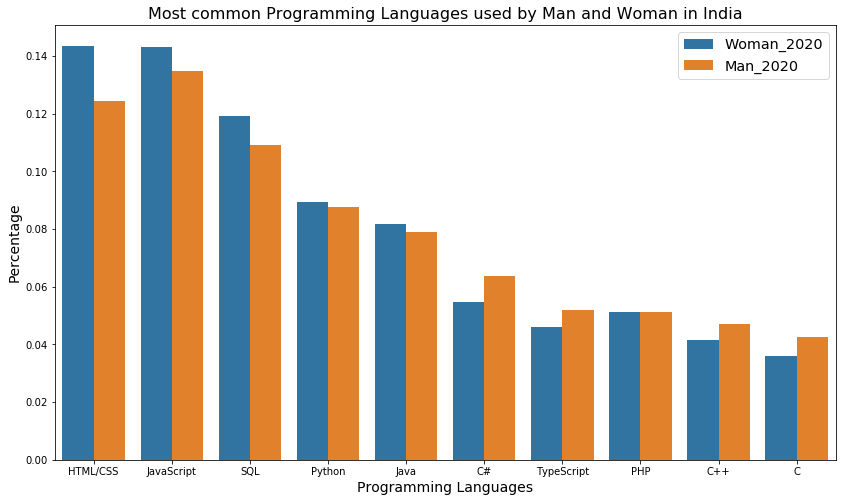

In [75]:
plt.figure(figsize=(14,8))
sns.barplot(y = 'Percentage', 
            x = 'Programming Language',
            
            hue = 'Year',
            data = worked_lang_chart_2020.sort_values(by=['Percentage'], ascending=False))

plt.ylabel("Percentage", fontsize = 14)
plt.xlabel("Programming Languages", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.title('Most common Programming Languages used by Man and Woman in India', size = 16)
plt.show()

In [120]:
column_needed=['Respondent','Gender','ConvertedComp','Country']
df_final=df_2020[column_needed]
df_final=df_final[df_final['Country']=='India']
df_final = df_final[df_final['Gender'].isin(["Man","Woman"])].dropna(axis=0,subset=['ConvertedComp'])

In [162]:
def prepare_data_india(df,column_needed,filter_gender,column_na,year):
    df_final = df[column_needed]
    df_final = df_final[df_final['Country']=='India']
    df_final = df_final[df_final['Gender'].isin(filter_gender)].dropna(axis=0,subset=[column_na])
    df_final['year']=year
    return df_final    

In [195]:
df_in_2020=prepare_data_india(df_2020,['Respondent','Gender','ConvertedComp','Country'],["Man","Woman"],'ConvertedComp','2020')
df_in_2019=prepare_data_india(df_2019,['Respondent','Gender','ConvertedComp','Country'],["Man","Woman"],'ConvertedComp','2019')
df_in_2018=prepare_data_india(df_2018,['Respondent','Gender','ConvertedSalary','Country'],["Male","Female"],'ConvertedSalary','2018')

In [196]:
df_in_2019.head()

,Respondent,Gender,ConvertedComp,Country,year
49,50,Man,5597.0,India,2019
67,68,Man,11194.0,India,2019
74,75,Woman,17491.0,India,2019
77,78,Man,7696.0,India,2019
82,83,Man,117540.0,India,2019


In [197]:
df_in_2018["Gender"].replace({"Male": "Man", "Female": "Woman"}, inplace=True)
df_in_2018= df_in_2018.rename(columns = {'ConvertedSalary': 'ConvertedComp'}, inplace = False)

In [198]:
df_in_2018.head()

,Respondent,Gender,ConvertedComp,Country,year
41,61,Man,123984.0,India,2018
45,71,Man,6576.0,India,2018
93,137,Man,34440.0,India,2018
95,140,Man,4128.0,India,2018
106,155,Man,4696.0,India,2018


In [220]:
df_in_final = df_in_2020.append(df_in_2019).append(df_in_2018)
df_in_final['year'] = pd.to_numeric(df_in_final['year'])

In [236]:
df_smry = df_in_final.groupby(['Gender','year']).mean().drop("Respondent",1)

In [237]:
df_smry.head(10)

ConvertedComp
Gender year               
Man    2018   26055.368109
       2019   28063.437297
       2020   26428.845674
Woman  2018   17216.187845
       2019   12892.684729
       2020   18173.524194

In [279]:
df_in_graph = df_smry.reset_index()
df_in_graph['year'] = pd.to_numeric(df_in_graph['year'])
df_in_graph = df_in_graph.sort_values(by='year')
df_in_graph.set_index('year', inplace=True)

In [280]:
df_in_graph.head()

,Gender,ConvertedComp
year,,
2018,Man,26055.368109
2018,Woman,17216.187845
2019,Man,28063.437297
2019,Woman,12892.684729
2020,Man,26428.845674


In [284]:
table = pd.pivot_table(df_in_graph, values='ConvertedComp', index=['year'],
                    columns=['Gender'], aggfunc=np.sum)

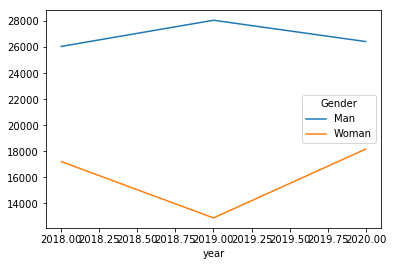

In [286]:
table.plot.line()

Text(0, 0.5, 'Average Salary')

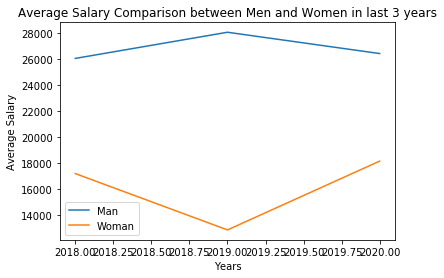

In [283]:
df_in_graph.groupby('Gender')['ConvertedComp'].plot(legend=True)
plt.title("Average Salary Comparison between Men and Women in last 3 years");
plt.xlabel('Years')
plt.ylabel('Average Salary')


In [276]:
df = pd.DataFrame({
   'pig': [20, 18, 489, 675, 1776],
   'horse': [4, 25, 281, 600, 1900]
   }, index=[1990, 1997, 2003, 2009, 2014])


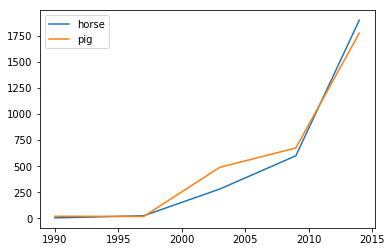

In [281]:
lines = df.plot.line()